# Availability factors per time slice for solar generation

### import libraries

In [1]:
import pandas as pd
% matplotlib inline 

### Load data

The data comes from the SWEEDS dataset, from the Canadian government http://climate.weather.gc.ca/prods_servs/engineering_e.html (STR file on Quebec\the MontrealMirabelA_1976_2005 folder)

In [2]:
solarIRR=pd.read_csv('solar/mirabel solar sweeds.csv')

data cleaning

In [3]:
solarIRR=solarIRR.rename(columns=lambda x:x.strip())

In [4]:
solarIRR=solarIRR.drop('Unnamed: 5',axis=1)

In [5]:
solarIRR['ELT'].unique()

array([101, 102, 103, 104, 105, 106, 107], dtype=int64)

In [6]:
solarIRR.shape

(672, 5)

From the documentation the dataset contains 5 columns
- ELT: code for the day of the week, from 101 to 107
- QR:(quarter) from 1:winter to 4: fall
- HR: hour of the day (from 1 to 24)
- XMAX: maximum solar irradiation
- MEAN: mean solar irradiation

### Create a column with the time slice

In [7]:
# dict to convert hours to the corresponding time slices
slices_equiv={20:'night',
              21:'night',
              22:'night',
              23:'night',
              24:'night',
              1:'night',
              2:'night',
              3:'night',
              4:'night',
              5:'night',
              6:'peak morning',
              7:'peak morning',
              8:'peak morning', 
              9:'day',
              10:'day',
              11:'day',
              12:'day',
              13:'day',
              14:'day',
              15:'day',
              16:'day',
              17:'peak evening',
              18:'peak evening',
              19:'peak evening',
}

In [8]:
solarIRR.loc[:,'dayts']=solarIRR['HR'].map(slices_equiv)

In [9]:
solarIRR.iloc[1:10]

,ELT,QR,HR,XMAX,MEAN,dayts
1,101,1,2,0.0,0.000,night
2,101,1,3,0.0,0.000,night
3,101,1,4,0.0,0.000,night
4,101,1,5,0.0,0.000,night
5,101,1,6,0.0,0.000,peak morning
6,101,1,7,19.0,0.719,peak morning
7,101,1,8,580.0,150.000,peak morning
8,101,1,9,1300.0,779.000,day
9,101,1,10,1860.0,1370.000,day


tag by time slice. From the QR we get the season, from dayts to what part of the day it belongs

In [10]:
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==1) ,'TS']='WD'
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==2) ,'TS']='RD'
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==3) ,'TS']='SD'
solarIRR.loc[(solarIRR['dayts']=='day') & (solarIRR['QR']==4) ,'TS']='FD'

In [11]:
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==1) ,'TS']='WN'
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==2) ,'TS']='RN'
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==3) ,'TS']='SN'
solarIRR.loc[(solarIRR['dayts']=='night') & (solarIRR['QR']==4) ,'TS']='FN'

In [12]:
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==1) ,'TS']='WP1'
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==2) ,'TS']='RP1'
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==3) ,'TS']='SP1'
solarIRR.loc[(solarIRR['dayts']=='peak morning') & (solarIRR['QR']==4) ,'TS']='FP1'

In [13]:
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==1) ,'TS']='WP2'
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==2) ,'TS']='RP2'
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==3) ,'TS']='SP2'
solarIRR.loc[(solarIRR['dayts']=='peak evening') & (solarIRR['QR']==4) ,'TS']='FP2'

The sum of weekly irradiance per time slice. the largest values are during summer day. The sum of irradiance is lower during the morning peak and evening peak because they are shorter. there is no irradince during night time slice

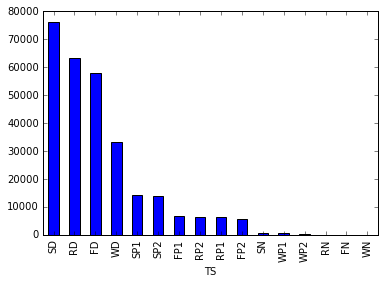

In [14]:
solarIRR.groupby('TS').sum().loc[:,'MEAN'].sort_values(ascending=False).plot(kind='bar')

Now we now how it is distributed in time, but we need to calculate the availability factor, in a way that the weighted average is 0.14, the average annual AF according to the Trottier Energy Futures Project

### calculate the mean solar irradiation per time slice

In [15]:
solar_ts_mean=solarIRR.groupby('TS').mean() 

In [16]:
solar_ts_mean['MEAN']

TS
FD     1033.232143
FN        0.015129
FP1     321.961905
FP2     264.705714
RD     1131.428571
RN        0.024014
RP1     293.482857
RP2     302.786190
SD     1358.446429
SN       10.081429
SP1     682.700000
SP2     657.004762
WD      595.398214
WN        0.000000
WP1      18.189952
WP2      11.062857
Name: MEAN, dtype: float64

number of hours per time slice

In [17]:
duration= {'FD':     728,
           'FN':     910,
           'FP1':    273,
           'FP2':    273,
           'RD':     736,
           'RN':     920,
           'RP1':    276,
           'RP2':    276, 
           'SD':     736,
           'SN':     920,
           'SP1':    276,
           'SP2':    276,
           'WD' :    728,
           'WN' :    910,
           'WP1':    273,
           'WP2':    273,
          }

In [18]:
solar_ts_mean['duration_h']=pd.Series(duration)

In [19]:
solar_ts_mean

,ELT,QR,HR,XMAX,MEAN,duration_h
TS,,,,,,
FD,104.0,4.0,12.5,2154.464286,1033.232143,728
FN,104.0,4.0,12.5,0.414286,0.015129,910
FP1,104.0,4.0,7.0,957.476190,321.961905,273
FP2,104.0,4.0,18.0,978.523810,264.705714,273
RD,104.0,2.0,12.5,2456.285714,1131.428571,736
RN,104.0,2.0,12.5,0.542857,0.024014,920
RP1,104.0,2.0,7.0,1085.142857,293.482857,276
RP2,104.0,2.0,18.0,1003.857143,302.786190,276
SD,104.0,3.0,12.5,2355.946429,1358.446429,736


### Checking the results make sense

In [20]:
(solar_ts_mean['MEAN']*solar_ts_mean['duration_h']).sum()/solar_ts_mean['duration_h'].sum()

424.63305132708814

roughly the average annuals solar irradiation, with something missed in the decimals

In [21]:
solarIRR['MEAN'].mean()

424.0097008928572

### Calculate the availability factor per time slice

we normalise and then multiply by the annual availability factor

In [22]:
solar_ts_mean['AF']=solar_ts_mean['MEAN']/solarIRR['MEAN'].mean()*0.14

if we calculate the weighted average of the AF using the duration of the TS we get in effect the annual average AF
or very close, The difference is probably because I am dividing by the average irradiance calculated from solarIRR instead of my transformed data

In [23]:
(solar_ts_mean['AF']*solar_ts_mean['duration_h']).sum()/solar_ts_mean['duration_h'].sum()

0.1402058185475676

In [24]:
solar_ts_mean

,ELT,QR,HR,XMAX,MEAN,duration_h,AF
TS,,,,,,,
FD,104.0,4.0,12.5,2154.464286,1033.232143,728,0.341154
FN,104.0,4.0,12.5,0.414286,0.015129,910,0.000005
FP1,104.0,4.0,7.0,957.476190,321.961905,273,0.106306
FP2,104.0,4.0,18.0,978.523810,264.705714,273,0.087401
RD,104.0,2.0,12.5,2456.285714,1131.428571,736,0.373576
RN,104.0,2.0,12.5,0.542857,0.024014,920,0.000008
RP1,104.0,2.0,7.0,1085.142857,293.482857,276,0.096902
RP2,104.0,2.0,18.0,1003.857143,302.786190,276,0.099974
SD,104.0,3.0,12.5,2355.946429,1358.446429,736,0.448533


In [25]:
#solar_ts_mean.to_csv('solarAFperTS.csv')